# 1) 데이터 선정 이유 및 문제 정의

데이터를 선정할 때에는 반드시 왜 해당 데이터를 선택했는지에 대해 장지훈님의 이유를 자세히 설명해주셔야 합니다. 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.


*   평소에 주식투자에 관심이 많기 때문에 우리나라의 주식 데이터를 선정했습니다.
*   주식에서 가장 큰 관심사는 대부분 주가를 예측하는 것이기 때문에 주가를 예측하는 회귀 문제로 결정 했습니다.





# 2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택

데이터를 선정함과 동시에 데이터를 통해서 내가 무엇을 해볼 수 있을지 가설을 세우는 것이 중요합니다.

가설은 쓸모 있어야 한다는 사실을 잊지마시길 바랍니다.

데이터 기반의 사고방식, data-driven의 마음가짐을 section1과 2에서 배웠습니다. 

이번에는 그것들을 심화시켜서 문제 해결을 시도 해봅니다.

## 태스크를 수행 결과

1.   해당 특성을 target으로 지정한 이유를 설명하세요

      *   하루 뒤의 종가를 타겟으로 선정했습니다.
      *   내일 가격이 오를지 떨어질지는 주식 투자를 하는 사람들의 관심사 이기때문입니다.
      


2.   해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요

      *   종가를 베이스 라인모델로 선정했습니다.

          내일의 주가는 어제의 종가일 가능성이 크기 때문에 단순히 어제의 종가로 예측한 모델보다 성능이 낮은 모델은 의미가 없는 모델로 생각해서 기준 모델을 선정 했습니다.
      
      *   평가지표
          *    RMSE : 에러의 평균을 직관적인 수치로 볼수 있어서 선택했습니다.
          *    R2_score : 정확도를 보기 위해서.

# 3) EDA와 데이터 전처리

가설을 정했고 베이스라인을 만들었다면 데이터의 탐색 및 가공을 시작해봅니다. 바로 적용이 될 수 있는 데이터도 있겠지만, 대부분의 데이터는 전처리 작업이 필요합니다.
데이터 전처리를 통해 할 수 있는 것은 다양하지만 다음을 시도해볼 수 있습니다.

*   EDA
*   Feature Engineering
*   데이터의 정규화
*   노이즈 제거
*   결측치 제거 혹은 대체
*   데이터 밸런스
*   그 외

## 라이브러리 설치

In [1]:
!pip install pykrx

In [2]:
!pip install finance-datareader

In [3]:
!pip install opendartreader
!pip install --upgrade opendartreader

In [4]:
!pip install pytrends
!pip install --upgrade pytrends

In [5]:
!pip install category_encoders==2.*
!pip install eli5
!pip install pandas-profiling==2.*
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 11.2 MB 23.3 MB/s 
     |████████████████████████████████| 890 kB 38.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [7]:
!pip install -U plotly

## Import

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

#시각화
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pdpbox.pdp import pdp_isolate, pdp_plot
import shap

from sklearn.pipeline import Pipeline , make_pipeline

# train, test 분리
from sklearn.model_selection import train_test_split

# 인코더
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder

#알고리즘
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

#Keras LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

#모델 선택
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import f_regression, SelectKBest

#정규화
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

#평가지표
from sklearn.metrics import roc_curve, roc_auc_score
from eli5.sklearn import PermutationImportance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, ShuffleSplit

#시간
from datetime import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import pytz
import time

from bs4 import BeautifulSoup
import urllib.request
import json
import glob
import sys
import os

#주식 라이브러리
import OpenDartReader
import FinanceDataReader as fdr
from pykrx import stock

#구글 라이브러리
from pytrends.request import TrendReq

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
fm._rebuild()
pd.options.plotting.backend = "plotly"

## 함수

### 주가 정보

In [10]:
#주가 정보 가저오기.
def getStockPrice(code, maxCount = 5):
  stocks = stock.get_index_portfolio_deposit_file(code)
  newDf = pd.DataFrame()
  cnt = 1
  for idx in stocks:
    data = stock.get_market_ohlcv(startday, endday, idx)
    data.reset_index(inplace=True)

    stockName = getStockName(idx)
    print(f'종목코드:{idx} 종목명:{stockName}')
    data.insert(0, '종목코드', idx)
    data.insert(1, '종목명', stockName)
    #DIV/BPS/PER/EPS/PBR를 조회
    fundamental = stock.get_market_fundamental(startday, endday, idx) 
    fundamental.reset_index(inplace=True)
    data = pd.merge(data, fundamental, on='날짜')

    #거래량
    trading = stock.get_market_trading_value_by_date(startday, endday, idx, detail=True)
    trading.reset_index(inplace=True)
    trading.drop(columns=['전체'], inplace=True)
    data = pd.merge(data, trading, on='날짜')
    time.sleep(1)
    newDf = pd.concat([newDf, data])

    cnt = cnt + 1
    if cnt > maxCount:
      break
    
  newDf.reset_index(drop=True, inplace=True)
  return newDf

### 종목코드로 종목명 가져오기

In [11]:
def getStockName(code):
  df = stock_codes[stock_codes['종목코드'] == code]
  if len(df) == 0:
    print(f'종목코드 에러-{code}')
    return '0'
  else:
    return df.head(1).회사명.iloc[0]

### 연속 거래일

In [12]:
#연속으로 매수하거나 매도한 거래일 수
def continuous_trading(t, df):
  grb = df[t].groupby(df['종목명'])
  newTargetName = t+'연속거래'
  newDf = pd.DataFrame(columns = [newTargetName])
  for name, g in grb:
      count = 0
      first = True
      
      for index, v in g.items():
        if first:
          first = False
          newDf.loc[index] = 0
        else:
          preValue = newDf.loc[index-1][0]
          if v > 0:
            if preValue > 0:
              newDf.loc[index] = preValue + 1 #이전 값도 +라면 기존에 +1을 해서 연속값을 더해줌
            else:
              newDf.loc[index] = 1
          elif v < 0:
            if preValue < 0:
              newDf.loc[index] = preValue - 1 #이전 값도 -라면 기존에 -1을 해서 연속값을 더해줌
            else:
              newDf.loc[index] = -1
          else:
            newDf.loc[index] = preValue #거래가 없으면 이전 연속거래 값을 넣음

  #index로 merge
  newDf[newTargetName] = newDf[newTargetName].apply(int)
  df = pd.concat([df, newDf], axis=1)
  return df

### 임직원 보유량 변경

In [13]:
def cleanDate(dateStr):
  #Dart에 날짜가 2021.12.27, 2021-12-27이렇게 두가지 형태로 있다
  print(dateStr)
  dateStr = dateStr.replace(' ','-').replace('.','-').replace('년', '').replace('월', '').replace('일', '')
  return dt.strptime(dateStr, "%Y-%m-%d")

#임원 거래 정보 가저오기
def tradeStockExecutives(stock_df, rcept_no):
  print('rcept_no:',rcept_no)

  soup = BeautifulSoup(dart.document(rcept_no))
  tables = soup.select("table")
  info_table = tables[len(tables)-1]
  tbody = info_table.select('tbody')
  trs = info_table.findAll('tr')

  for i in range(2, len(trs)-1):
    tus = trs[i].find_all('tu')
    tradeDate = cleanDate(tus[1].text)
    if (tradeDate in stock_df.index) == False:
      print(f'없는 Index 입니다!! :{tus[1].text} len(stock_df.index):{len(stock_df.index)}')
      continue

    tradeType = tus[0].text #거래 타입:장내매수, 장내매도인 경우에만 데이터를 가저오기위해 필요
    stockType = tus[2].text #우선주 보통주 구분
    
    tes = trs[i].find_all('te')
    amount = int(tes[1].text.replace(',', ''))  #변경 수량

    if (tradeType == '장내매수(+)' or tradeType == '장내매도(-)') and stockType == '보통주':
      stock_df.at[tradeDate, '임직원거래'] = stock_df.loc[tradeDate].임직원거래 + amount
      print(f'내돈내산 tradeType:{tradeType} tradeDate:{tradeDate} stockType:{stockType} amount:{amount}')
    else:
      stock_df.at[tradeDate, '임직원보유변화'] = stock_df.loc[tradeDate].임직원보유변화 + amount
      print(f'tradeType:{tradeType} tradeDate:{tradeDate} stockType:{stockType} amount:{amount}')

  return stock_df

def executiveStockTrading(stock_df):
  report_df = dart.list(stock_df.종목코드[0], start=startday, end=endday, kind='D')
  report_df = report_df[report_df['report_nm'] == '임원ㆍ주요주주특정증권등소유상황보고서']

  if len(report_df) == 0:
    return stock_df

  rcept_nos = report_df['rcept_no']
  for rcept_no in rcept_nos:
    stock_df = tradeStockExecutives(stock_df, rcept_no)

  return stock_df

### 네이버 API

In [14]:
class NaverDataLabOpenAPI():
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.keywordGroups = []
        self.url = "https://openapi.naver.com/v1/datalab/search"

    def add_keyword_groups(self, groupName, keywords):
        keyword_gorup = {
            'groupName': groupName,
            'keywords': keywords
        }
        
        self.keywordGroups.append(keyword_gorup)
    
    def clear_keyword_groups(self):
        self.keywordGroups = []

    def get_data(self, startDate, endDate, timeUnit, device, ages, gender):
        """
        요청 결과 반환
        timeUnit - 'date', 'week', 'month'
        device - None, 'pc', 'mo'
        ages = [], ['1' ~ '11']
        gender = None, 'm', 'f'
        """

        # Request body
        body = json.dumps({
            "startDate": startDate,
            "endDate": endDate,
            "timeUnit": timeUnit,
            "keywordGroups": self.keywordGroups,
            "device": device,
            "ages": ages,
            "gender": gender
        }, ensure_ascii=False)
        
        # Results
        request = urllib.request.Request(self.url)
        request.add_header("X-Naver-Client-Id",self.client_id)
        request.add_header("X-Naver-Client-Secret",self.client_secret)
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            # Json Result
            result = json.loads(response.read())
            
            df = pd.DataFrame(result['results'][0]['data'])[['period']]
            for i in range(len(self.keywordGroups)):
                tmp = pd.DataFrame(result['results'][i]['data'])
                tmp = tmp.rename(columns={'ratio': result['results'][i]['title']})
                df = pd.merge(df, tmp, how='left', on=['period'])
            self.df = df.rename(columns={'period': '날짜'})
            self.df['날짜'] = pd.to_datetime(self.df['날짜'])
            
        else:
            print("Error Code:" + rescode)
            
        return self.df
    
    def plot_daily_trend(self):
        """
        일 별 검색어 트렌드 그래프 출력
        """
        colList = self.df.columns[1:]
        n_col = len(colList)

        fig = plt.figure(figsize=(12,6))
        plt.title('일 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=self.df['날짜'], y=self.df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        
        return fig
    
    def plot_monthly_trend(self):
        """
        월 별 검색어 트렌드 그래프 출력
        """
        df = self.df.copy()
        df_0 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(0).reset_index().rename(columns={'날짜': '월'})
        df_1 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(1).reset_index().rename(columns={'날짜': '년도'})

        df = pd.merge(df_1[['년도']], df_0, how='left', left_index=True, right_index=True)
        df['날짜'] = pd.to_datetime(df[['년도','월']].assign(일=1).rename(columns={"년도": "year", "월":'month','일':'day'}))
        
        colList = df.columns.drop(['날짜','년도','월'])
        n_col = len(colList)
                
        fig = plt.figure(figsize=(12,6))
        plt.title('월 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=df['날짜'], y=df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        
        return fig
    
    def plot_pred_trend(self, days):
        """
        검색어 시계열 트렌드 예측 그래프 출력
        days: 예측일수
        """
        colList = self.df.columns[1:]
        n_col = len(colList)
        
        fig_list = []
        for i in range(n_col):
            
            globals()[f"df_{str(i)}"] = self.df[['날짜', f'{colList[i]}']]
            globals()[f"df_{str(i)}"] = globals()[f"df_{str(i)}"].rename(columns={'날짜': 'ds', f'{colList[i]}': 'y'})

            m = Prophet()
            m.fit(globals()[f"df_{str(i)}"])

            future = m.make_future_dataframe(periods=days)
            forecast = m.predict(future)
            forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
            
            globals()[f"fig_{str(i)}"] = m.plot(forecast, figsize=(12,6))
            plt.title(colList[i], size=20, weight='bold')
            
            fig_list.append(globals()[f"fig_{str(i)}"])
            
        return fig_list

### 검색량 정보

In [15]:
#주식은 쉬는날이 많지만 검색량 데이터는 매일 있기때문에 평균으로 계산하는 함수
def updateSearch(stock_df, search_df, search_engine):
  passDatas = []

  for index in search_df.index:
    search_volume = search_df.loc[index][0]
    if index in stock_df.index:
      if len(passDatas) > 0:
        passDatas.append(search_volume)
        print(f'passDatas:{passDatas} mean:{np.mean(passDatas)}')
        search_volume = np.mean(passDatas)
        passDatas.clear()
      
      stock_df.at[index, search_engine] = search_volume
      print(f'index:{index} value:{search_volume}')
    else:
      passDatas.append(search_volume)
      print('없는 날짜:', index)

  return stock_df

#네이버 검색량 정보
def updateNaverSearch(stock_df):
  name = getStockName(stock_df.종목코드[0])
  naver.clear_keyword_groups()
  naver.add_keyword_groups(name, [name])
  naver_df = naver.get_data(startday, endday, timeUnit, device, ages, gender)
  naver_df.날짜 = naver_df.날짜.apply(pd.to_datetime)
  naver_df.set_index('날짜', inplace=True)
  
  return updateSearch(stock_df, naver_df, '네이버검색')

#구글 검색량 정보
def updateGoogleSearch(stock_df):
  name = getStockName(stock_df['종목코드'].iloc[0])
  start = dt.strptime(startday, '%Y-%m-%d')
  dt_endday = dt.strptime(endday, '%Y-%m-%d')

  while(True):
    end = start + relativedelta(months=3)
    if end > dt_endday:
      stock_df = updateGoogleSearchMonth(stock_df, name, dt.strftime(start, '%Y-%m-%d'), dt.strftime(dt_endday, '%Y-%m-%d'))
      break
    
    stock_df = updateGoogleSearchMonth(stock_df, name, dt.strftime(start, '%Y-%m-%d'), dt.strftime(end, '%Y-%m-%d'))
    start = start + relativedelta(months=3)

  return stock_df

#구글 검색정보는 6달 이상 요청 하면 일주일 단위로 데이터를 주기 때문에 나눠서 호출
def updateGoogleSearchMonth(stock_df, keywords, start, end):
  pytrends.build_payload(keywords, cat=0, timeframe=f'{start} {end}', geo='KR', gprop='')
  google_df = pytrends.interest_over_time()
  google_df.drop(columns='isPartial', inplace=True)
  google_df.reset_index(inplace=True)
  google_df.date = google_df.date.apply(pd.to_datetime)
  google_df.set_index('date', inplace=True)
  return updateSearch(stock_df, google_df, '구글검색')

### 공매도

In [16]:
#공매도
def updateShorting(stock_df):
  shorting = stock.get_shorting_volume_by_date(startday, endday, stock_df.종목코드[0])
  shorting.drop(columns='매수', inplace=True)
  shorting.rename(columns={'비중':'공매도비중'}, inplace=True)
  return pd.merge(stock_df, shorting, left_index=True, right_index=True)

### 한국 오늘 날짜

In [17]:
def getDateByTimeZone(tz_name = 'Asia/Seoul'):
  tz = pytz.timezone(tz_name)
  kr_now = dt.now(tz)
  cur_date = kr_now.strftime("%Y-%m-%d")
  cur_time = kr_now.strftime("%H:%M:%S")
  print(f'{tz_name} date: {cur_date}')
  print(f'{tz_name} time: {cur_time}')
  return cur_date, cur_time

### 개별 주식 초기화

In [18]:
def InitStock(stock_name):
  stock_df = df[df['종목명'] == stock_name].set_index('날짜')
  stock_df = executiveStockTrading(stock_df)
  stock_df = updateNaverSearch(stock_df)
  stock_df = updateGoogleSearch(stock_df)
  stock_df = updateShorting(stock_df)
  return stock_df

### 지정한 날짜 만큼 타겟을 이동

In [19]:
def makeDateByPrevious(X, target_name, day):
  y = X[target_name]
  y = y[day:]
  X = X[:-day]

  y.index = X.index
  return X, y

### 예측 결과 보기

In [20]:
def showPredict(X_test, y_test, pred):
  print(f"예측값 R2 score:{r2_score(y_test, pred)} RMSE:{mean_squared_error(y_test, pred, squared=False)}")
  print(f"종가 R2 score:{r2_score(y_test, X_test['종가'])} RMSE:{mean_squared_error(y_test, X_test['종가'], squared=False)}")
  
  pred_df = X_test.copy()
  pred_column_name = f'+{pred_day}일예측가'
  pred_df.reset_index(inplace=True)
  pred_df = pred_df[['날짜','종가']]

  s_pred = list(map(float, pred))
  for i in range(0, pred_day):
    s_pred = np.insert(s_pred, 0, np.NaN, axis=0)
    pred_df = pred_df.append({'날짜':np.NaN, '종가':np.NaN}, ignore_index=True)

  pred_df[pred_column_name] = pd.Series(s_pred, name=pred_column_name)

  for i in range(pred_day, len(pred_df)):
    if pred_df.loc[i, '날짜'] is np.NaN:
      oldDt = dt.strptime(pred_df.loc[i-1, '날짜'], '%Y-%m-%d')
      newDt = oldDt + timedelta(days=1)
      pred_df.loc[i, '날짜'] = newDt.strftime('%Y-%m-%d')

  fig = pred_df.plot(x='날짜', y=['종가', pred_column_name])
  fig.show()

### Permutation Importance 확인

In [21]:
def showPermutationImportance(X, y, model):
  permuter = PermutationImportance(
      model,
      scoring= 'accuracy',
      n_iter= 5,
      random_state= 2
  )

  permuter.fit(X, y)
  feature_names = X.columns.tolist()
  showImportance(permuter.feature_importances_, feature_names)

### Feature Importance 확인

In [22]:
def showImportance(values, columns):
  series = pd.Series(values, columns).sort_values(ascending=False)
  df = pd.DataFrame(series, columns=['value'])
  fig = df.plot.bar()
  fig.show()

### 주식 데이터 나누기

In [23]:
def getStockSplit(stockName):
  #drop_feature = ['종목코드','BPS','PER','PBR','EPS','DIV','DPS','금융투자','보험','투신','사모','은행','기타금융','연기금','기타법인','개인','외국인','기타외국인']
  #stock_df = stocks[stockName].drop(columns='종목코드')
  #stock_df = stocks[stockName][['시가','고가','저가','종가','거래량']]
  stock_df = stocks[stockName][['금융투자','보험','투신','사모','은행','기타금융','연기금','기타법인','개인','외국인','기타외국인','종가','임직원거래','임직원보유변화','네이버검색','구글검색','공매도']]

  X_train, y_train = makeDateByPrevious(stock_df, '종가', day=pred_day) # pred_day 뒤 종가를 타겟으로 설정
  columns = X_train.columns

  #train, test 분리
  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

  return X_train, X_val, X_test, y_train, y_val, y_test, columns

### GetLinearRegression

In [24]:
def getLinearRegression(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  pipe = make_pipeline(
    SimpleImputer(), 
    LinearRegression()
  )
  pipe.fit(X_train, y_train)
  model = pipe.named_steps['linearregression']
  pred = model.predict(X_test)
  showPredict(X_test, y_test, pred)
  showImportance(model.coef_, columns)
  return model

### GetDecisionTreeRegressor



In [25]:
def getDecisionTreeRegressor(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  pipe = make_pipeline(
    SimpleImputer(), 
    DecisionTreeRegressor(criterion="mae")
  )
  pipe.fit(X_train, y_train)
  model = pipe.named_steps['decisiontreeregressor']
  pred = pipe.predict(X_test)
  showPredict(X_test, y_test, pred)
  showImportance(model.feature_importances_, columns)
  print('score:',pipe.score(X_test, pred))

  return model
  

### GetXGBRegressor

In [26]:
def getXGBRegressor(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  pipe = make_pipeline(
    XGBRegressor(
      n_estimators=1000,
      learning_rate=0.2,
      n_jobs=-1
    )
  )
  pipe.fit(X_train, y_train)
  model = pipe.named_steps['xgbregressor']
  pred = model.predict(X_test)
  showPredict(X_test, y_test, pred)
  showImportance(model.feature_importances_, columns)

  return model

### GetXGBClassifier

In [27]:
def getXGBClassifier(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  pipe = make_pipeline(
      SimpleImputer(strategy='median'),
      XGBClassifier(n_estimators=200
                    , random_state=2
                    , n_jobs=-1
                    , max_depth=7
                    , learning_rate=0.2
                  )
  )
  pipe.fit(X_train, y_train)
  model = pipe.named_steps['xgbclassifier']
  pred = pipe.predict(X_test)
  showPredict(X_test, y_test, pred)
  showImportance(model.feature_importances_, columns)
  print('score:',pipe.score(X_test, pred))

  return model

### GetRandomForestRegressor

In [28]:
def getRandomForestRegressor(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  pipe = make_pipeline(
    SimpleImputer(), 
    RandomForestRegressor(random_state=10, n_jobs=-1, oob_score=True)
  )  
  pipe.fit(X_train, y_train)
  print(pipe.named_steps)
  model = pipe.named_steps['randomforestregressor']
  pred = pipe.predict(X_test)
  showPredict(X_test, y_test, pred)
  showImportance(model.feature_importances_, columns)
  print('score:',pipe.score(X_test, pred))

  return model

### RandomizedSearchCV

In [29]:
def getClf(pipe, X_train, y_train):
  dists = {
      'simpleimputer__strategy': ['mean', 'median'], 
      'selectkbest__k': range(1, len(X_train.columns)+1), 
      'ridge__alpha': [0.1, 1, 10], 
  }

  clf = RandomizedSearchCV(
      pipe, 
      param_distributions=dists, 
      n_iter=50, 
      cv=3,
      scoring='root_mean_absolute_error',
      verbose=1,
      n_jobs=-1
  )

  clf.fit(X_train, y_train);
  print('최적 하이퍼파라미터: ', clf.best_params_)
  print('MAE: ', -clf.best_score_)
  return clf

### PDP

In [30]:
def drawPDP(model, X, feature):
  isolated = pdp_isolate(
      model=model, 
      dataset=X, 
      model_features=X.columns, 
      feature=feature,
      grid_type='percentile',
      num_grid_points=10
  )
  pdp_plot(isolated, feature_name=feature);

## API 초기화

In [31]:
#Dart api
api_key = '***'
dart = OpenDartReader(api_key)

#Naver api
client_id = "***"
client_secret = "***"
timeUnit = 'date'
device = ''
ages = []
gender = ''
naver = NaverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

#Google api
pytrends = TrendReq(hl='ko', tz=540)

# == 전처리 ==

In [32]:
#구글 드라이브에서 파일 읽기. 데이터를 생성 할때는 True로 변경
makeAllStock = False
makeTargetStock = False

print(f'makeAllStock:{makeAllStock} makeTargetStock:{makeTargetStock}')
today, _ = getDateByTimeZone()  #오늘 날짜 가져오기
startday = '2020-01-01'
endday = today
scaler = MinMaxScaler()

#모델링 할 종목
target_stocks = ['삼성전자', 'NAVER', '신한지주', '엔씨소프트', '넷마블']
stocks = {}

googleDrivePath = '/content/drive/MyDrive/Colab Notebooks/Project/Stock/'

if makeAllStock:
  stock_codes = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
  stock_codes['종목코드'] = stock_codes['종목코드'].apply(lambda x: str(x).zfill(6))
  df = getStockPrice('1035', 50) #kospi50 종목 코드 1035
  df['종목코드'] = df['종목코드'].astype("str")
  df['임직원거래'] = 0      #장내매수 장내 매도 한것
  df['임직원보유변화'] = 0  #장내거래한것 외에 다른이유로 변경된것 ex)신규선입, 보너스를 주식으로 받은것 등등
  df['네이버검색'] = 0      #네이버 검색량 0~100
  df['구글검색'] = 0        #구글 검색량 0~100
  df['날짜'] = pd.to_datetime(df['날짜'])

  #연속 거래일을 추가할 거래량 항목들
  df = continuous_trading('금융투자', df)
  df = continuous_trading('연기금', df)
  df = continuous_trading('개인', df)
  df = continuous_trading('외국인', df)
  df.to_csv(f'{googleDrivePath}stock.csv', index=False)
else:
  df = pd.read_csv(f'{googleDrivePath}stock.csv',  dtype={'종목코드':'string'})
  
df['날짜'] = df['날짜'].apply(pd.to_datetime)

if makeTargetStock:
  for stockName in target_stocks:
    stocks[stockName] = InitStock(stockName)
    stocks[stockName].drop(columns='종목명', inplace=True)
    stocks[stockName].to_csv(f'{googleDrivePath}{stockName}.csv')
else:
  for stockName in target_stocks:
    stocks[stockName] = pd.read_csv(f'{googleDrivePath}{stockName}.csv', index_col=0, dtype={'종목코드':'string'})

df.head()

makeAllStock:False makeTargetStock:False
Asia/Seoul date: 2022-01-12
Asia/Seoul time: 15:41:23


,종목코드,종목명,날짜,시가,고가,저가,종가,거래량,BPS,PER,PBR,EPS,DIV,DPS,금융투자,보험,투신,사모,은행,기타금융,연기금,기타법인,개인,외국인,기타외국인,임직원거래,임직원보유변화,네이버검색,구글검색,금융투자연속거래,연기금연속거래,개인연속거래,외국인연속거래
0,005930,삼성전자,2020-01-02,55500,56000,55000,55200,12993228,35342,8.54,1.56,6461,2.57,1416,-137409401300,2927744200,-670267000,3382316900,498076000,3237664600,-2379681600,7000985800,152706355800,-30775179800,1481386400,0,0,0,0,0,0,0,0
1,005930,삼성전자,2020-01-03,56000,56600,54900,55500,15422255,35342,8.59,1.57,6461,2.55,1416,-184098232200,4346828700,20474133700,19024124700,1228127500,1513223500,14179169800,-5130936300,66485169500,61435174600,543216500,0,0,0,0,-1,1,1,1
2,005930,삼성전자,2020-01-06,54900,55600,54600,55500,10278951,35342,8.59,1.57,6461,2.55,1416,-89532303100,1465213400,6226403300,4745710600,88403500,320695400,10357234300,209967000,23109555500,42705408300,303711800,0,0,0,0,-2,2,2,2
3,005930,삼성전자,2020-01-07,55700,56400,55600,55800,10009778,35342,8.64,1.58,6461,2.54,1416,7471904100,-2885155900,6813036300,1366513300,205154300,54799500,-10054351400,-416560800,-722044800,-3195217800,1361923200,0,0,0,0,1,-1,-1,-1
4,005930,삼성전자,2020-01-08,56200,57400,55900,56800,23501171,35342,8.79,1.61,6461,2.49,1416,-62952262600,18282554800,10117536900,21260739400,539818000,108617600,16864079000,-11444581500,-234778050700,242770501700,-768952600,0,0,0,0,-1,1,-2,1


## **태스크를 수행 결과**

1.   Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?

    *   없었습니다.
    *   train, test 데이터를 나눌때 날짜순으로 정렬해서 최신 데이터를 test으로 사용했습니다.


2.   장지훈님이 만들고자 하는 모델은 언제 유용한가요? 어떤 한계를 가지고 있나요?

    *   활용
        
        *   일정 기간 뒤의 주가 예측
        *   예측 결과보다 실제가격이 낮은 주식들 파악해서 저평가 여부 확인

    *   한계

        *   PER,PBR 등의 주가지표가 3달에 한번 갱신되는 분기 재무제표를 기반으로 계산 하기 때문에 갱신 후 시간이 지날 데이터의 정확도가 희석 됩니다.
        
        *   AI 입장에서는 loss가 가장 적은 값은 전날의 주가일 가능성이 높기 때문에 전날의 주가를 예측하는 무의미한 모델이 될 가능 성이 높다

# 4) 머신러닝 방식 적용 및 교차검증

In [33]:
#예측일
pred_day = 1

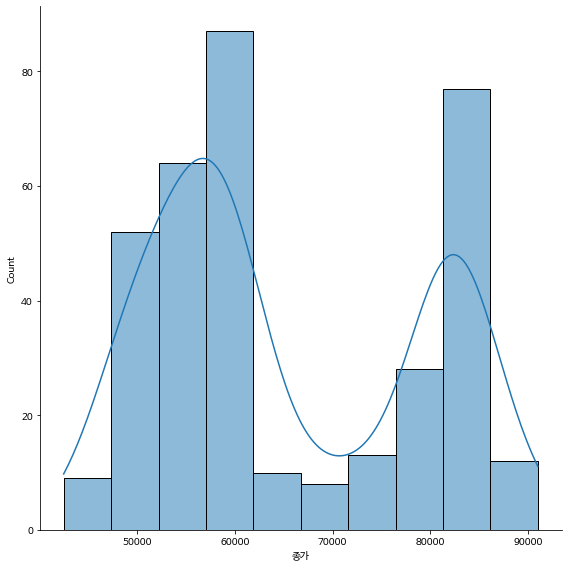

In [34]:
#타겟 분포
X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit('삼성전자')
sns.displot(y_train, kde=True, height=8)

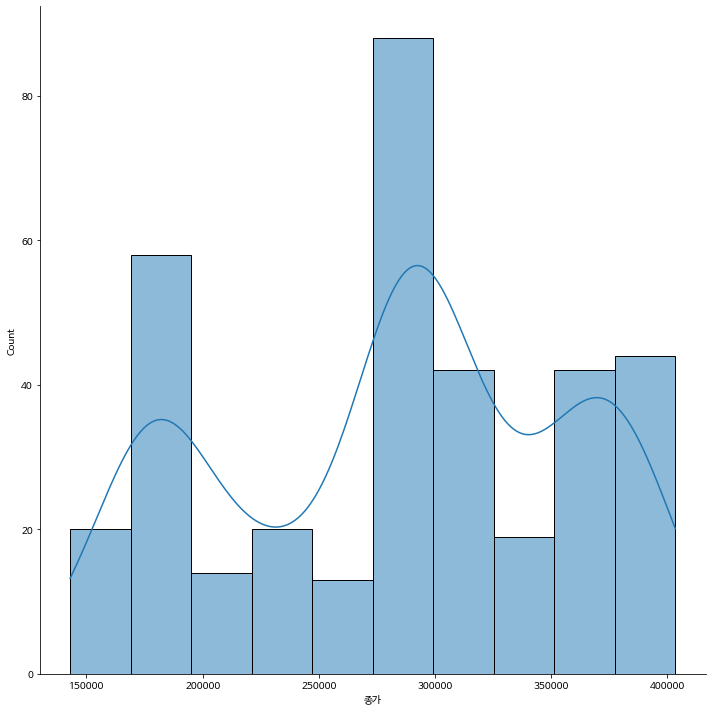

In [35]:
X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit('NAVER')
sns.displot(y_train, kde=True, height=10)

데이터의 탐색과 전처리 작업이 끝났다면 모델링을 통해 베이스라인과의 성능 비교를 해봅니다.

*    Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)


## Linear

### LinearRegression

In [36]:
getLinearRegression('삼성전자')
getLinearRegression('NAVER')

예측값 R2 score:0.9176829202781163 RMSE:1010.642831821013
종가 R2 score:0.916104801837298 RMSE:1020.2844662920546


예측값 R2 score:0.9069467303993322 RMSE:5776.962813120056
종가 R2 score:0.9005522374379785 RMSE:5972.157622389639


LinearRegression()

### XGBRegressor

In [37]:
best_model = getXGBRegressor('삼성전자')
getXGBRegressor('NAVER')

[06:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
예측값 R2 score:0.779594607959229 RMSE:1653.7270492350826
종가 R2 score:0.916104801837298 RMSE:1020.2844662920546


[06:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
예측값 R2 score:0.5058697475641827 RMSE:13312.342269501205
종가 R2 score:0.9005522374379785 RMSE:5972.157622389639


XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1)

## Tree-based

### DecisionTreeRegressor 

In [38]:
getDecisionTreeRegressor('삼성전자')
getDecisionTreeRegressor('NAVER')

예측값 R2 score:0.24900444575546243 RMSE:3052.6105831810614
종가 R2 score:0.916104801837298 RMSE:1020.2844662920546


score: 1.0
예측값 R2 score:0.4329864719783586 RMSE:14260.359151762445
종가 R2 score:0.9005522374379785 RMSE:5972.157622389639


score: 1.0


DecisionTreeRegressor(criterion='mae')

### XGBClassifier

In [39]:
getXGBClassifier('삼성전자')
getXGBClassifier('NAVER')

예측값 R2 score:-8.331804007500894 RMSE:10760.576192751018
종가 R2 score:0.916104801837298 RMSE:1020.2844662920546


score: 1.0
예측값 R2 score:-8.525499240760622 RMSE:58449.07285532474
종가 R2 score:0.9005522374379785 RMSE:5972.157622389639


score: 1.0


XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, n_jobs=-1,
              objective='multi:softprob', random_state=2)

## Ensemble

### RandomForest

In [40]:
getRandomForestRegressor('삼성전자')
getRandomForestRegressor('NAVER')

{'simpleimputer': SimpleImputer(), 'randomforestregressor': RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=10)}
예측값 R2 score:0.6779305614083142 RMSE:1999.0676012856104
종가 R2 score:0.916104801837298 RMSE:1020.2844662920546


score: 1.0
{'simpleimputer': SimpleImputer(), 'randomforestregressor': RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=10)}
예측값 R2 score:0.5335939272105712 RMSE:12933.49356834235
종가 R2 score:0.9005522374379785 RMSE:5972.157622389639


score: 1.0


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=10)

## 태스크를 수행 결과

1.   모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?

    *   베이스 라인보다 좋지 않다
    *   

2.   모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?

    *   항목 추가
    *   항목 추가

3.   최종 모델에 관해 설명하세요.

    *   항목 추가
    *   항목 추가

# 5) 머신러닝 모델 해석

프로젝트에서 가장 중요하다고 볼 수 있는 부분 입니다. 우리는 SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석하는 방법에 대해서 배웠습니다.

여러분의 프로젝트에도 이러한 해석 방법을 활용해 머신러닝 모델을 비전문가라도 조금 더 쉽게 이해하고 접근할 수 있도록 해주셔야 합니다.



*   PDP, SHAP을 활용하여 최종 모델을 설명합니다
*   시각화는 "설명"이 제일 중요합니다.

## PDP

금융투자
보험
투신
사모
은행
기타금융
연기금
기타법인
개인
외국인
기타외국인
종가
임직원거래
임직원보유변화
네이버검색
구글검색


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


공매도


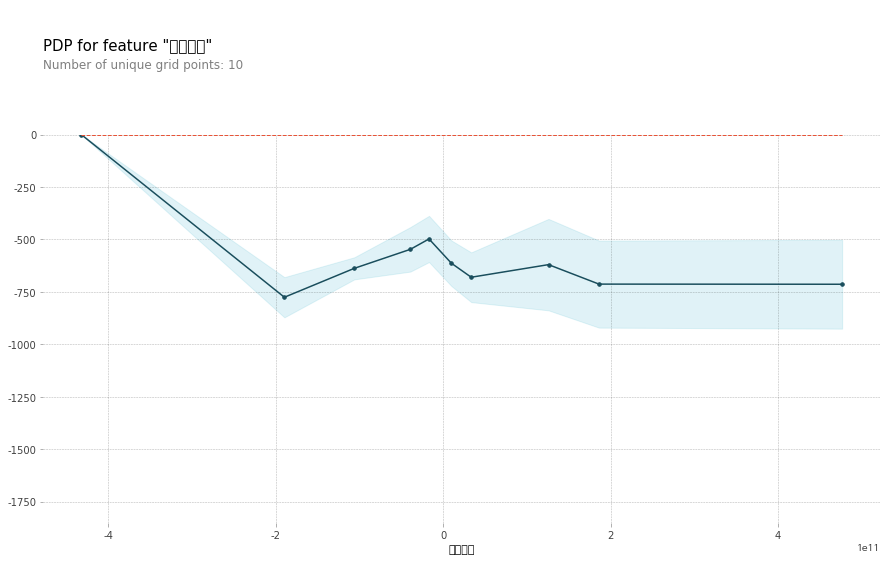

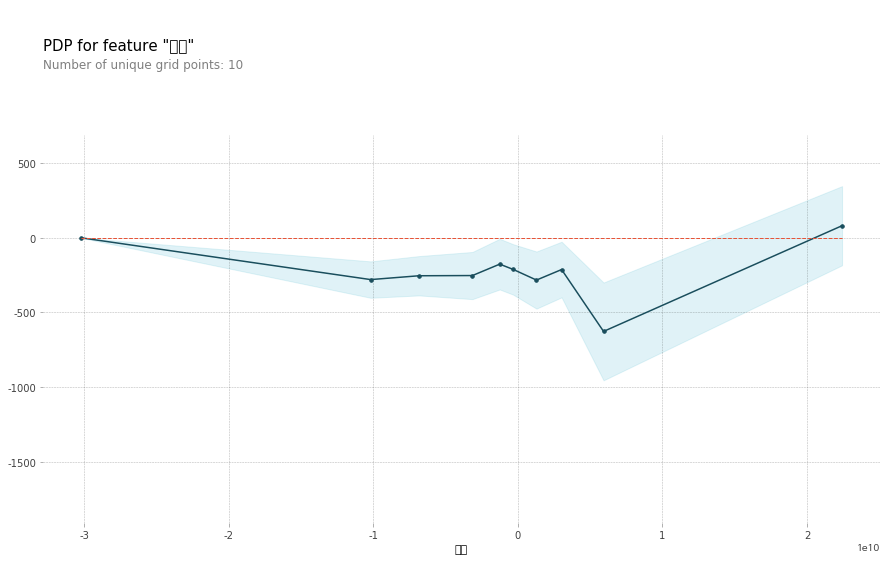

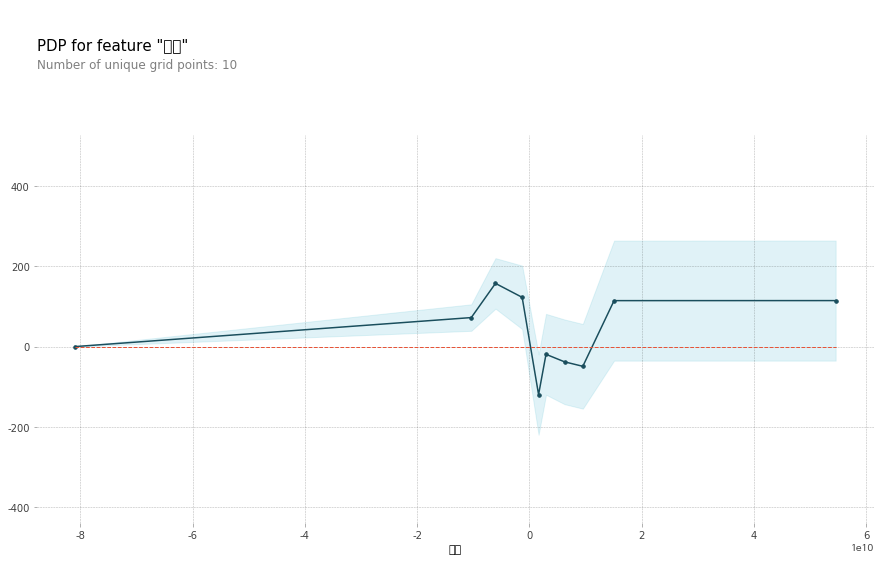

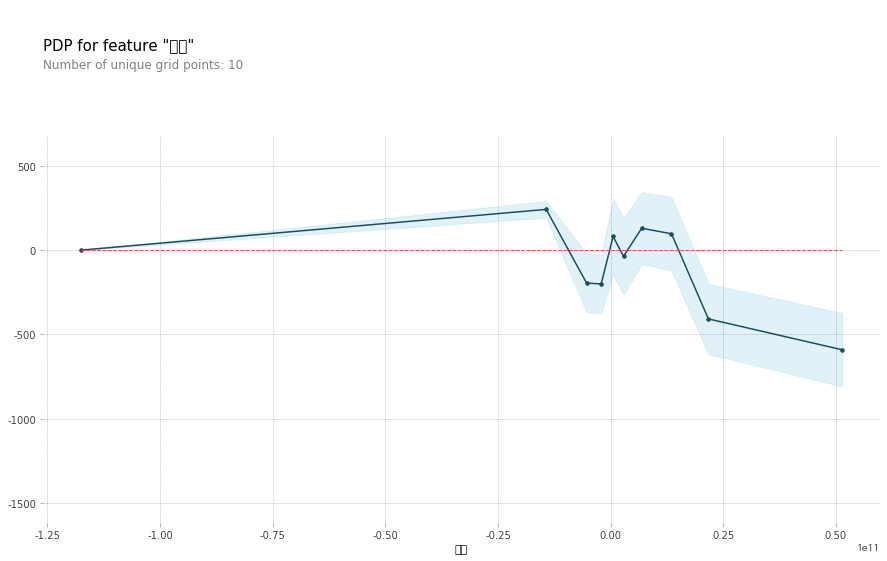

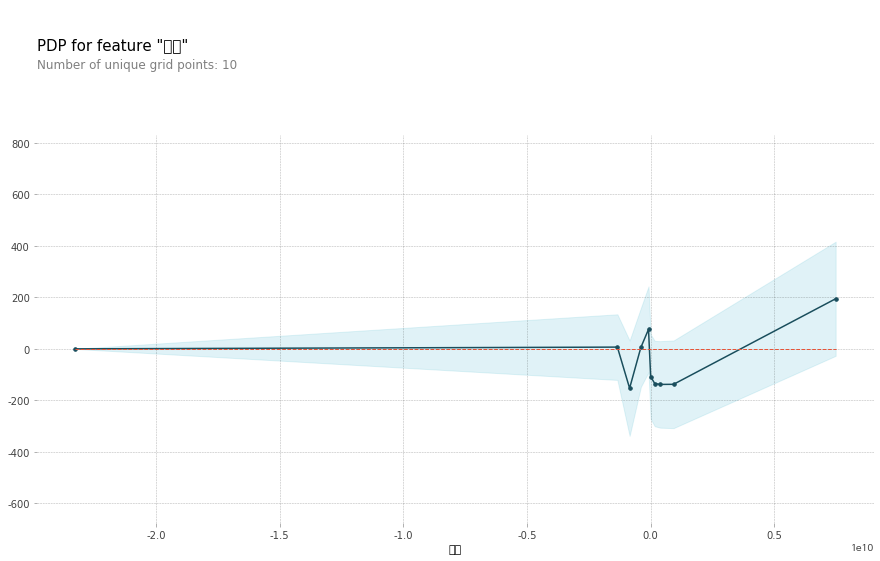

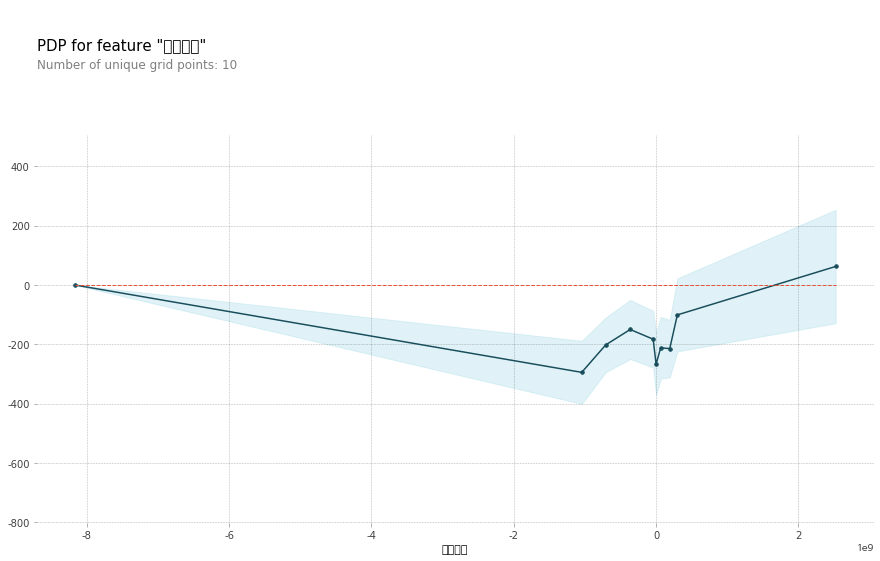

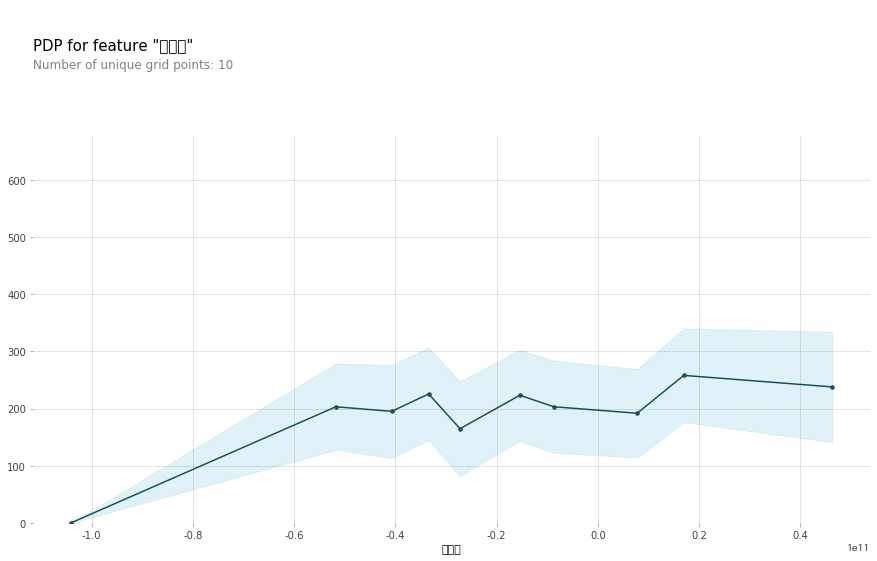

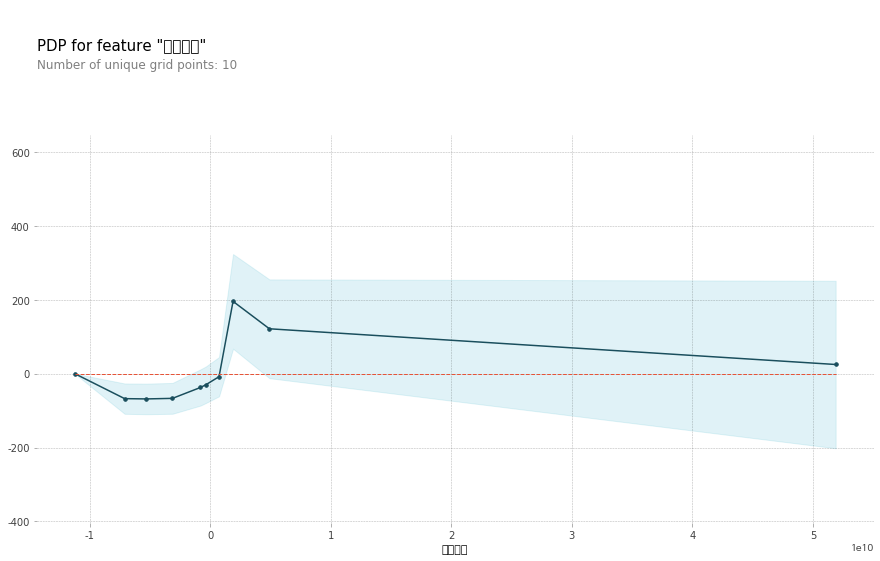

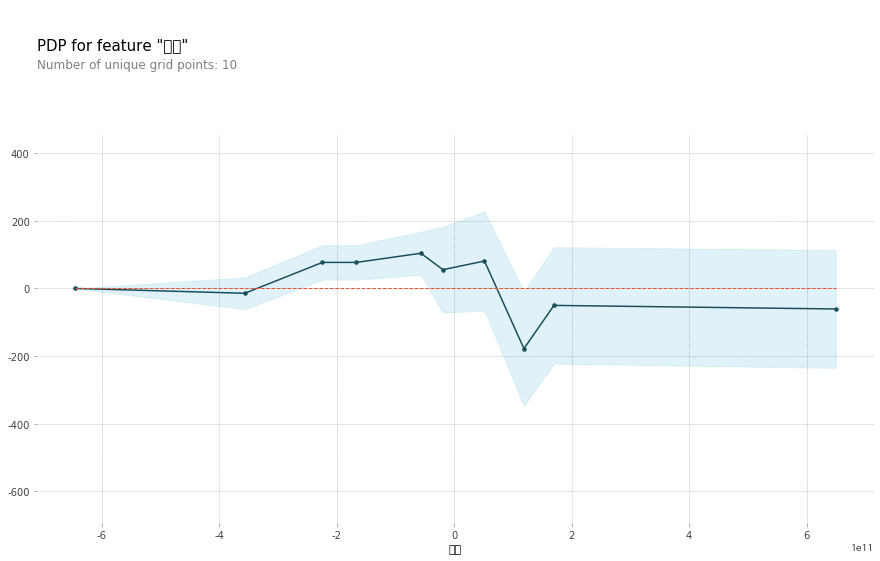

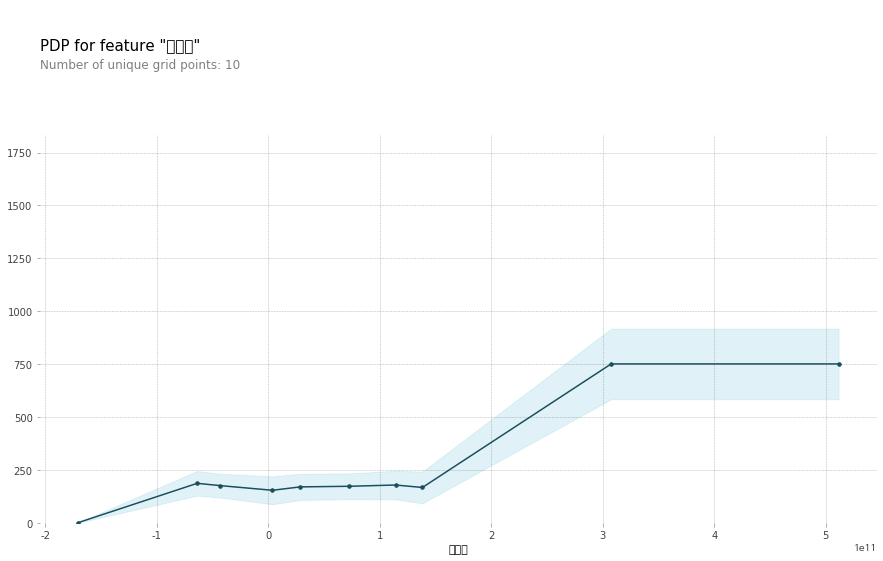

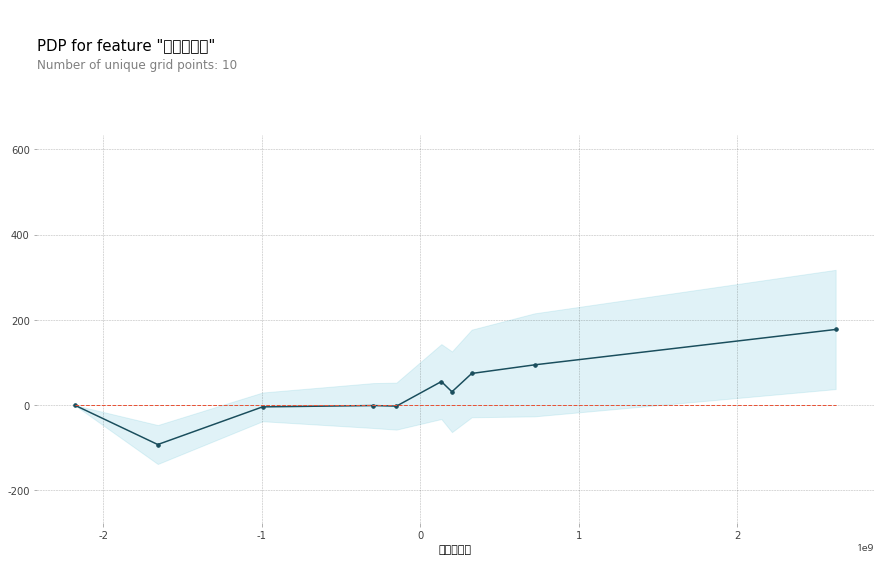

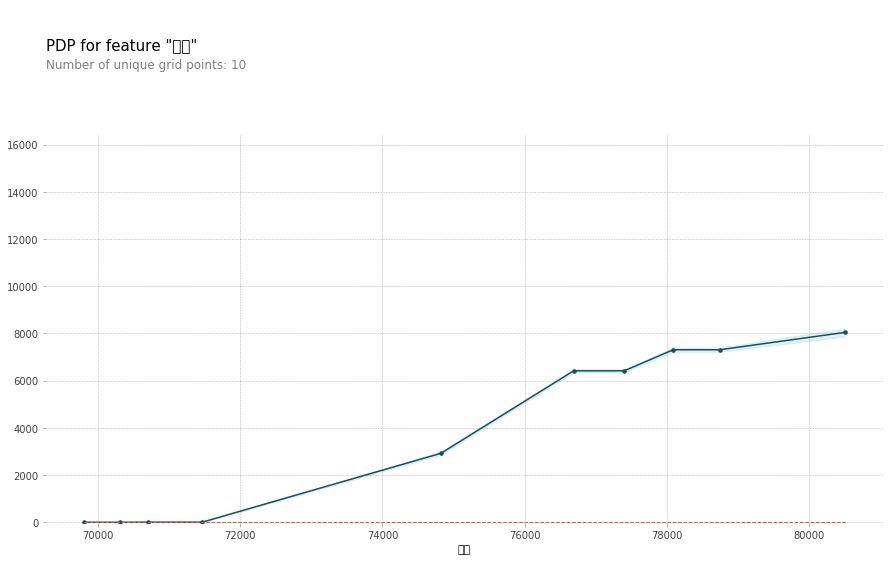

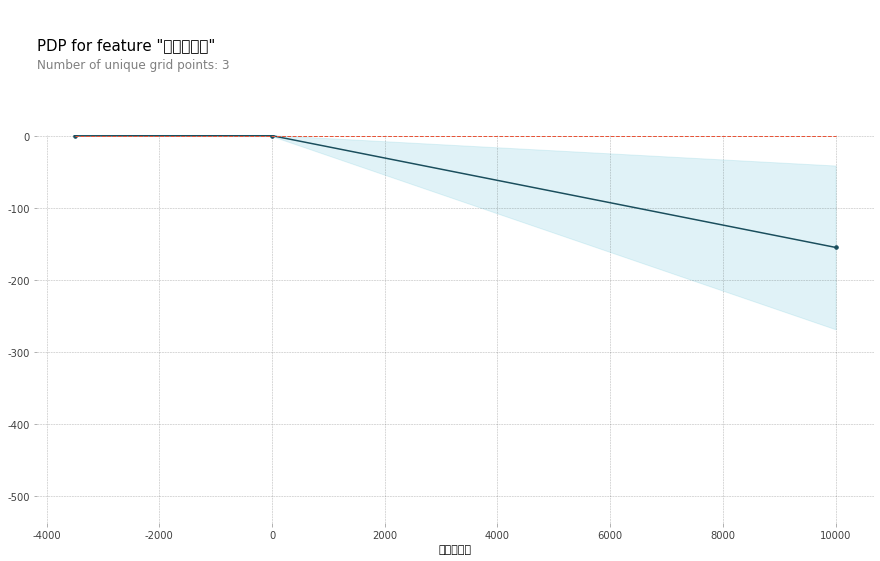

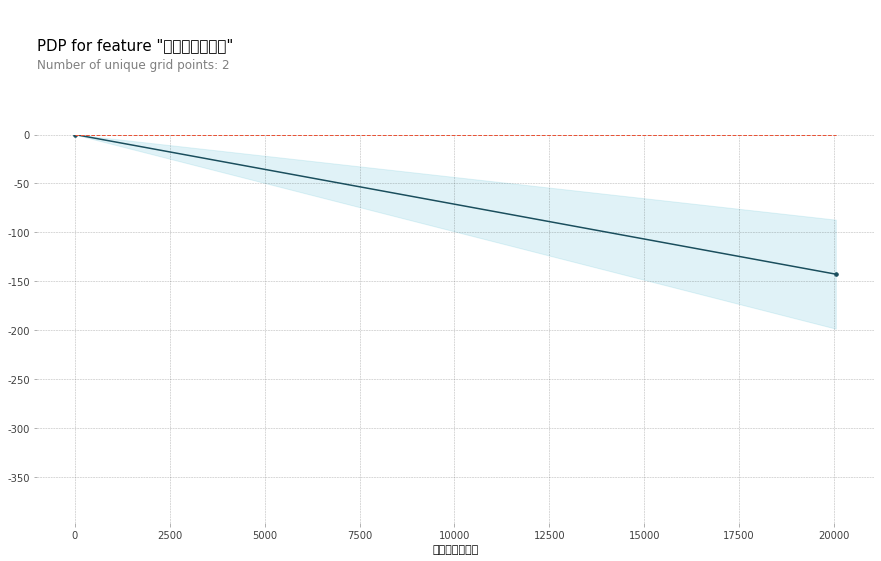

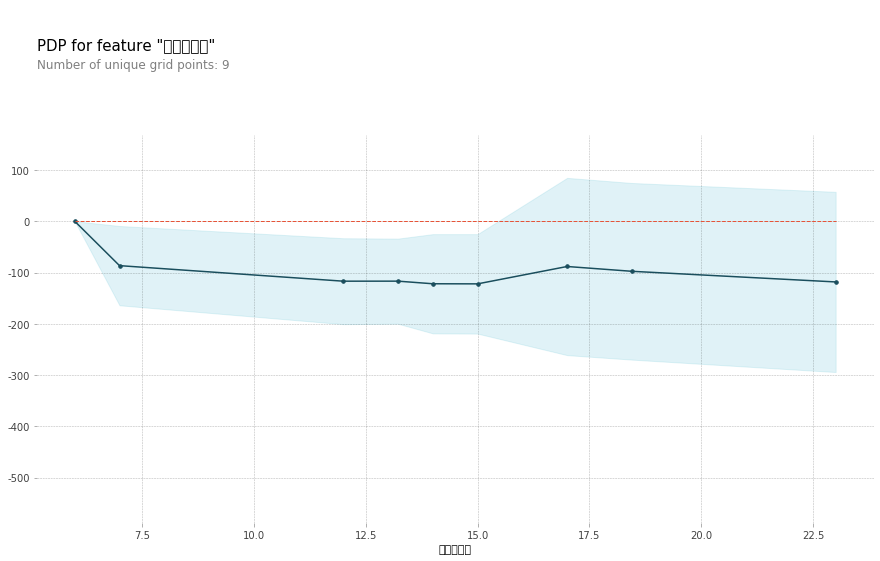

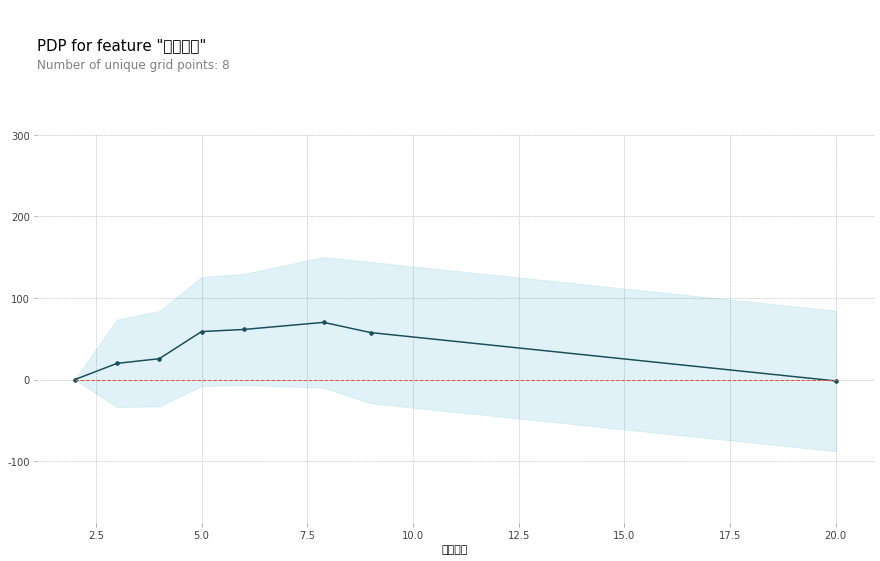

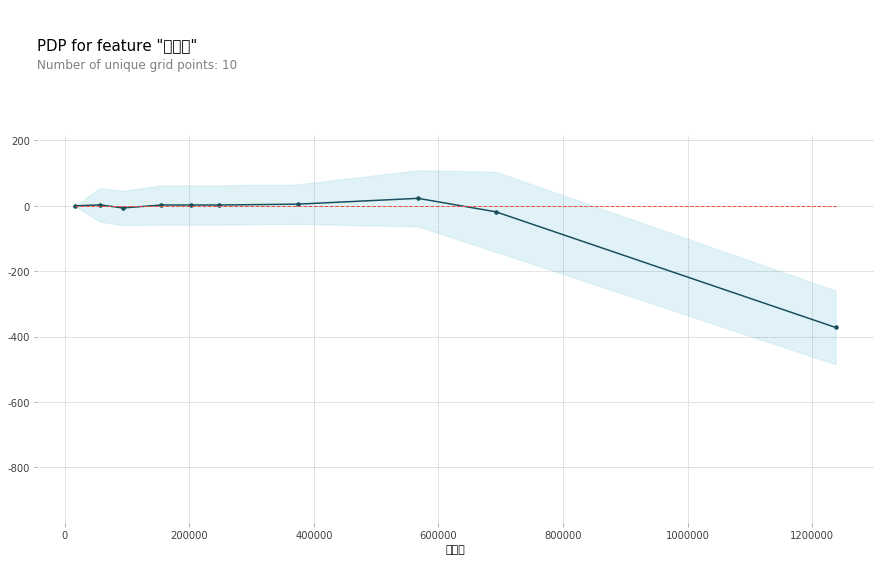

In [41]:
X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit('삼성전자')
for col in X_test.columns:
  print(col)
  drawPDP(best_model, X_test, col)

## SHAP

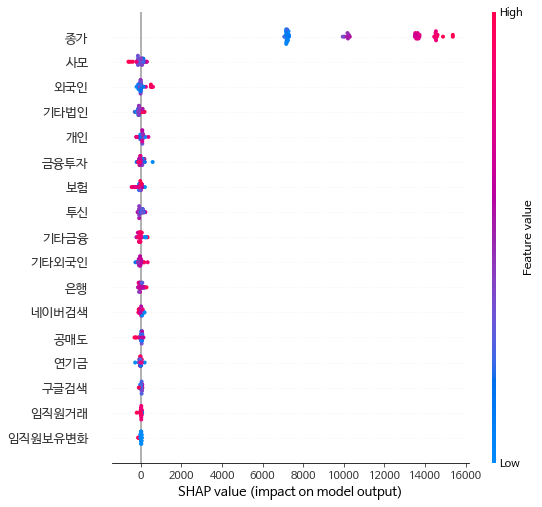

In [42]:
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:])

## 태스크를 수행 결과

1.   모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?

    *   시가, 고가, 저가, 종가
    *   구글, 네이버 검색량
    *   임원진의 보유량 변화

2.   어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?

    *   종목에 대한 뉴스
        *    뉴스의 키워드로 호재, 악재로 분류해서 추가
    *   전자공시에 자기주식취득 같은 주가에 영향을 줄 것같은 공시
        *    Dart에서 특정 이름의 공시 정보를 받아온다



# Test

In [44]:
def showModelGridSearchCV(stockName):
  X_train, X_val, X_test, y_train, y_val, y_test, columns = getStockSplit(stockName)
  random_state = 2

  pipe_lr = Pipeline([('scl', StandardScaler()),
                      ('clf', LogisticRegression(random_state=random_state))])

  pipe_rf = Pipeline([('scl', StandardScaler()),
                      ('clf', RandomForestClassifier(random_state=random_state ,))])

  pipe_svm = Pipeline([('scl', StandardScaler()),
                      ('clf', SVC(random_state=random_state , probability = True))])

  pipe_lda = Pipeline([('scl', StandardScaler()),
                      ('clf', LDA(n_components = 2 ))])

  pipe_knn = Pipeline([('scl', StandardScaler()),
                      ('clf', KNN())])

  pipe_ridge = Pipeline([('scl', StandardScaler()),
                      ('clf', RidgeClassifier())])
  
  aram_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  depth_range = [7,8,9]
  min_samples_split_range = [0.5, 0.7 , 0.9]
  param_range = [0.5, 0.1]
  param_range_fl = np.logspace(0,-5,5)

  grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                    'clf__C': param_range_fl,
                    'clf__solver': ['liblinear']}] 

  grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                    'clf__min_samples_leaf': param_range,
                    'clf__max_depth': depth_range,
                    'clf__min_samples_split': min_samples_split_range }]

  grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                      'clf__C': param_range}]

  grid_params_lda = [{"clf__tol" : param_range_fl , 
                      "clf__solver" : ["svd","lsqr","eigen"]} ]

  grid_params_qda = [{"clf__tol" : param_range_fl} ]

  grid_params_knn = [{"clf__n_neighbors" : [2,4,6] , 
                      "clf__weights" : ["uniform","distance"] , 
                      'clf__algorithm': ["ball_tree", "kd_tree", "brute"],
                    } ]

  grid_params_ridge = [
      {"clf__solver" : ["svd","cholesky","lsqr","sparse_cg" , "sag","saga"] ,
      "clf__tol" : param_range_fl , 
      "clf__alpha" : param_range_fl , 
      }
  ]


  pipe = [
      pipe_lr , pipe_rf , pipe_svm , 
      pipe_lda , pipe_knn , pipe_ridge
        ]
  params = [
      grid_params_lr , grid_params_rf , grid_params_svm , 
      grid_params_lda , grid_params_knn , grid_params_ridge , 
  ]

  jobs = 20

  grid_dict = {0: 'Logistic Regression', 
              1: 'Random Forest', 
              2: 'Support Vector Machine' ,
              3: "Linear Discriminant Analysis",
              4: "KNNClassifier" , 
              5: "RidgeClassifier" , 
              }

  model_best = {}
  model_prob = {}
  model_pred = {}
  model_rmse = {}
  model_r2_score = {}
  model_best_params = {}

  for idx , (param , model) in enumerate(zip(params , pipe)) :
      print(f'{idx}:{grid_dict[idx]}')
      search = GridSearchCV(model, param, n_jobs=jobs , verbose=-1, scoring='r2' )
      search.fit(X_train , y_train)
      y_pred = search.predict(X_test)
      try :
          y_prob = search.predict_proba(X_test)
      except Exception as e :
          pass
      model_best[grid_dict.get(idx)] = search.best_estimator_
      model_rmse[grid_dict.get(idx)] = mean_squared_error(y_test, y_pred, squared=False)
      model_r2_score[grid_dict.get(idx)] = r2_score(y_test, y_pred)
      model_prob[grid_dict.get(idx)] = y_prob
      model_pred[grid_dict.get(idx)] = y_pred
      model_best_params[grid_dict.get(idx)] = search.best_params_

  pred_df = X_test.copy()
  pred_df.reset_index(inplace=True)
  pred_df = pred_df[['날짜','종가']]

  columns = ['종가']

  print('날짜 빈값 추가')
  #내일 날짜로 빈값 추가
  for i in range(len(pred_df), len(pred_df) + pred_day):
    oldDt = dt.strptime(pred_df.loc[i-1, '날짜'], '%Y-%m-%d')
    newDt = oldDt + timedelta(days=1)
    pred_df = pred_df.append({'날짜':newDt.strftime('%Y-%m-%d'), '종가':np.NaN}, ignore_index=True)

  for index, values in model_pred.items():
    s_pred = list(map(float, values))
    newCol = f'+{pred_day} {index}'
    for i in range(0, pred_day):
      print(f'i:{i}')
      s_pred = np.insert(s_pred, 0, np.NaN, axis=0)

    columns.append(newCol)    
    print(f'len(pred_df):{len(pred_df)}, len(s_pred):{len(s_pred)}')
    pred_df[newCol] = s_pred

  fig = pred_df.plot(x='날짜', y=columns)
  fig.update_xaxes(
      dtick="d1",
      tickformat="%d\n%m\n%Y")
  fig.show()
  showScore(model_rmse, 'RMSE')
  showScore(model_r2_score, 'R2-score')

In [45]:
def showScore(result, name):
  output = pd.DataFrame([result.keys() , result.values()], index = ["algo", name]).T
  if name == 'RMSE':
    output = output.append({"algo":"Base model", name:mean_squared_error(y_test, X_test['종가'], squared=False)}, ignore_index=True)
  elif name == 'R2-score':
    output = output.append({"algo":"Base model", name:r2_score(y_test, X_test['종가'])}, ignore_index=True)

  output.sort_values([name], inplace=True)
  fig ,ax = plt.subplots(figsize=(20, 10))
  sns.set(font_scale = 2)
  sns.barplot(y="algo", x=name, data=output)
  plt.show()

0:Logistic Regression
1:Random Forest
2:Support Vector Machine
3:Linear Discriminant Analysis
4:KNNClassifier
5:RidgeClassifier
날짜 빈값 추가
i:0
len(pred_df):52, len(s_pred):52
i:0
len(pred_df):52, len(s_pred):52
i:0
len(pred_df):52, len(s_pred):52
i:0
len(pred_df):52, len(s_pred):52
i:0
len(pred_df):52, len(s_pred):52
i:0
len(pred_df):52, len(s_pred):52


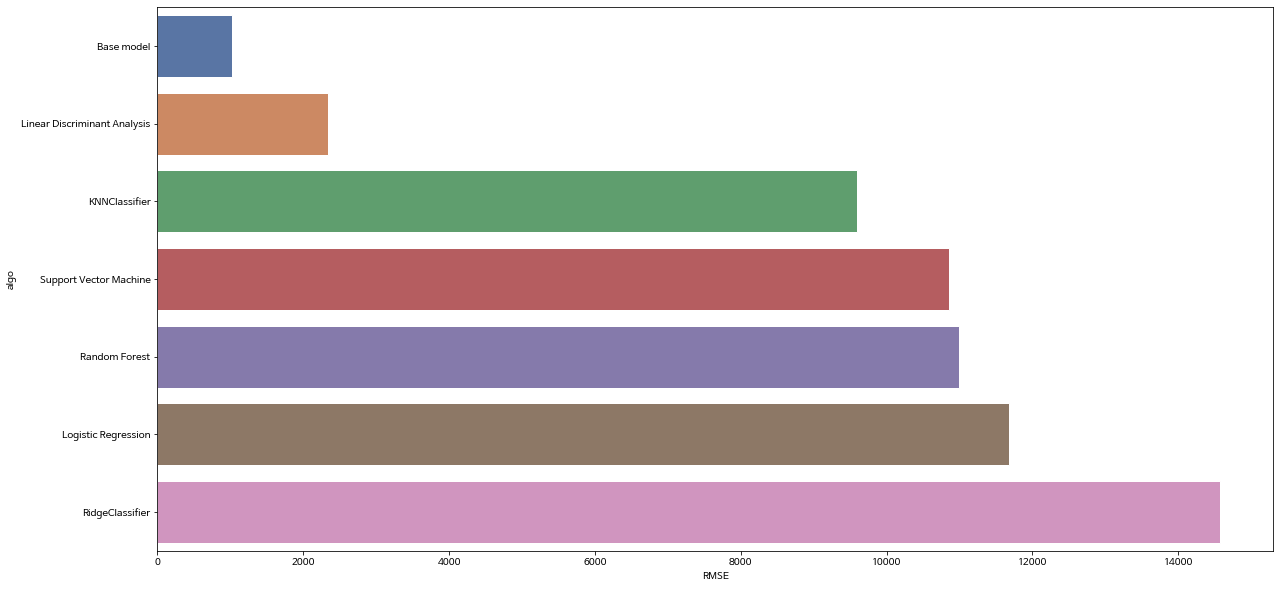

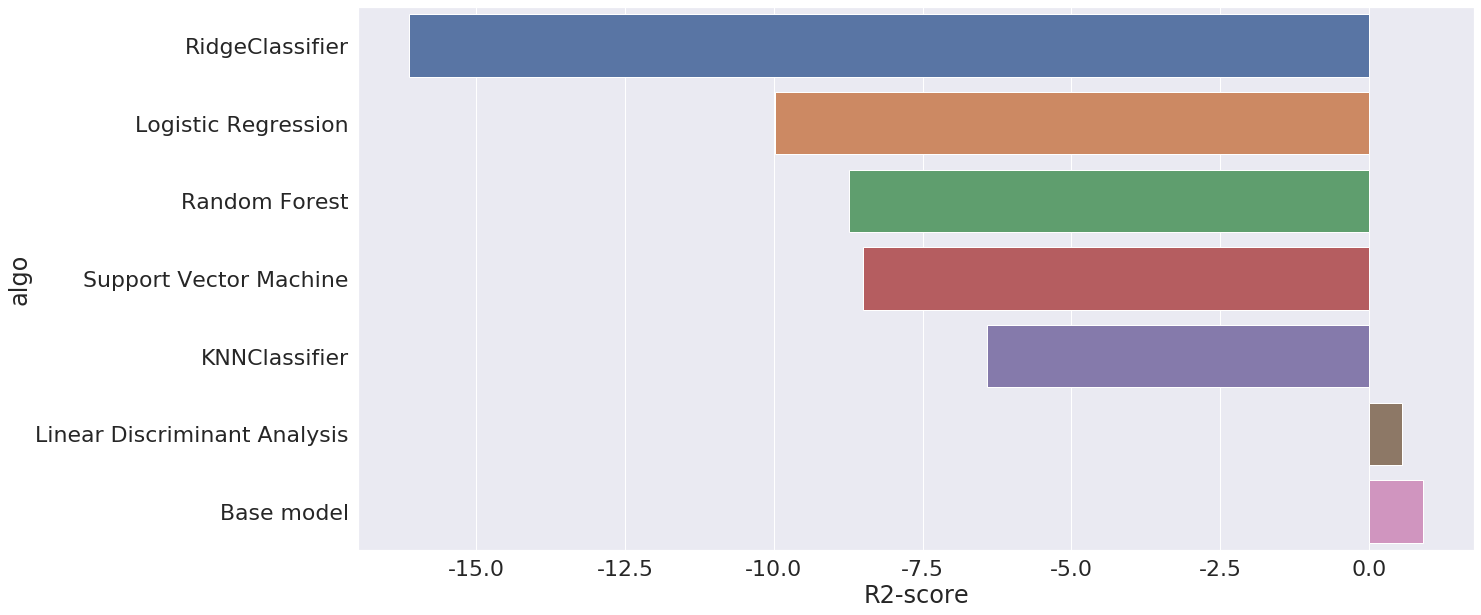

In [46]:
showModelGridSearchCV('삼성전자')